<a href="https://colab.research.google.com/github/yoosukyeong/Machine_Learning_basic/blob/main/Logistic_Regression%EC%9C%BC%EB%A1%9C_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/yoosukyeong/Machine_Learning_basic/main/data/titanic_clean.csv')

In [ ]:
data

,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0
...,...,...,...,...,...,...,...,...,...
877,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,S,0
878,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,S,1
879,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,S,0
880,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,C,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    882 non-null    int64  
 1   Name      882 non-null    object 
 2   Gender    882 non-null    object 
 3   Age       882 non-null    float64
 4   SibSp     882 non-null    int64  
 5   Parch     882 non-null    int64  
 6   Ticket    882 non-null    object 
 7   Embarked  882 non-null    object 
 8   Survived  882 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.1+ KB


In [ ]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,882.000000,882.000000,882.000000,882.000000,882.000000
mean,2.311791,29.541950,0.520408,0.375283,0.377551
std,0.835681,12.783114,1.105210,0.804909,0.485049
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [ ]:
data.corr()

<ipython-input-6-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.344640,0.080974,0.019907,-0.338345
Age,-0.344640,1.000000,-0.230080,-0.155920,-0.048872
SibSp,0.080974,-0.230080,1.000000,0.415633,-0.038739
Parch,0.019907,-0.155920,0.415633,1.000000,0.072772
Survived,-0.338345,-0.048872,-0.038739,0.072772,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-11-11a5b0e4535c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', vmin = -1, vmax = 1, annot = True)


<Axes: >

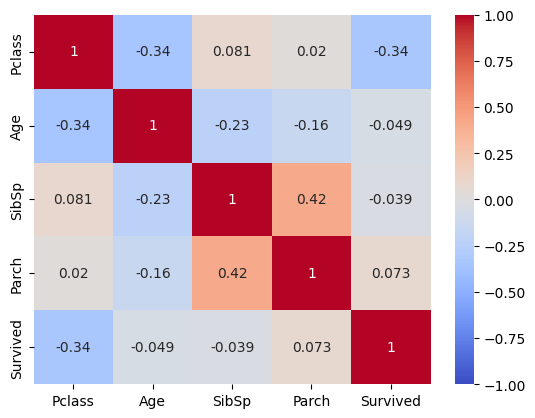

In [ ]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin = -1, vmax = 1, annot = True)

In [ ]:
data['Gender'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
data['Gender'].nunique()

2

In [ ]:
data['Name'].nunique()

882

In [ ]:
data['Ticket'].nunique()

679

In [ ]:
data['Embarked'].nunique()

3

In [ ]:
data = pd.get_dummies(data, columns = ['Gender', 'Embarked'], drop_first = True)

In [ ]:
data.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [ ]:
data.head()

,Pclass,Age,SibSp,Parch,Survived,Gender_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


In [ ]:
X = data.drop('Survived', axis = 1)
y = data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
pd.DataFrame({'actual' : y_test, 'pred' : pred})

,actual,pred
805,0,0
564,0,0
188,1,1
171,0,0
854,0,0
...,...,...
739,1,0
259,1,0
404,1,0
216,1,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, pred)

0.7570621468926554

In [ ]:
lr.coef_

array([[-1.20116858, -0.038226  , -0.36571393, -0.02748824, -2.72906126,
        -0.21883698, -0.41771894]])

In [ ]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Gender_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
pd.Series(lr.coef_[0], index = X_train.columns)

Pclass        -1.201169
Age           -0.038226
SibSp         -0.365714
Parch         -0.027488
Gender_male   -2.729061
Embarked_Q    -0.218837
Embarked_S    -0.417719
dtype: float64

## Python: Numpy

In [ ]:
import numpy as np

In [ ]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

In [ ]:
np.array([[[1, 2, 3, 4, 5],
[1, 2, 3, 4, 5],
[1, 2, 3, 4, 5]],
[[1, 2, 3, 4, 5],
[1, 2, 3, 4, 5],
[1, 2, 3, 4, 5]],
[[1, 2, 3, 4, 5],
[1, 2, 3, 4, 5],
[1, 2, 3, 4, 5]]])

array([[[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]],

       [[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]],

       [[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]]])

In [ ]:
data.head()

,Pclass,Age,SibSp,Parch,Survived,Gender_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


In [ ]:
np_x = np.array(data.head())

In [ ]:
np_x

array([[ 3., 22.,  1.,  0.,  0.,  1.,  0.,  1.],
       [ 1., 38.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 3., 26.,  0.,  0.,  1.,  0.,  0.,  1.],
       [ 1., 35.,  1.,  0.,  1.,  0.,  0.,  1.],
       [ 3., 35.,  0.,  0.,  0.,  1.,  0.,  1.]])

In [ ]:
np_x[0]

array([ 3., 22.,  1.,  0.,  0.,  1.,  0.,  1.])

In [ ]:
np_x[1][1]

38.0

In [ ]:
np_x[1][1:4]

array([38.,  1.,  0.])